## welcome
### Intro
In this python notebook, I will analyze data on 10841 apps and 64295 reviews that were scrapped from the google apps store.
I used python and pandas for data cleaning and data manipulation
Seaborn over matplotlib had used from data visualization

### Dataset
the dataset has been taken from Kaggle,
you can view the link: https://www.kaggle.com/lava18/google-play-store-apps 

### Goals
* What is the distribution of rating?
* Which category has the highest share? 
* Are paid apps getting more popular the free apps? 
* What is the correlation between the rating of the app and the cost or her popularity.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import ipywidgets as widgets

In [83]:
app_df = pd.read_csv("googleplaystore.csv",encoding= "utf-8")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [84]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [85]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [86]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [87]:
reviews_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [88]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### <span style="color:red">Data cleaning</span> 
* There are no all-blank rows
* There are many reviews with App names but without any other information 
* Change the datatype of "Price" and "Installs" to float
* Remove duplicate

In [89]:
print("reviews DataFrame shape before:", reviews_df.shape)
columns = ["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"]
null_rows = reviews_df[reviews_df[columns].isna().any(axis=1)]
reviews_df.drop(index=null_rows.index, inplace=True)
app_df.drop(index= app_df[app_df.Rating.isnull()].index, inplace=True)
print("reviews DataFrame shape after:", reviews_df.shape)

reviews DataFrame shape before: (64295, 5)
reviews DataFrame shape after: (37427, 5)


In [90]:
# I will not use these columns in this analysis
app_df.drop(columns=["Last Updated", "Current Ver", "Android Ver"], axis=1,inplace=True)

In [91]:
#there is one row with bed data that i need to remove
bed_row = app_df.loc[app_df["App"]=="Life Made WI-Fi Touchscreen Photo Frame"].index
app_df.drop(index=bed_row, inplace=True)

In [92]:
app_df["Price"] = app_df["Price"].str.replace('$','', regex=True)
app_df["Installs"]= app_df["Installs"].str.replace(r'[\+\,]','', regex=True)

In [93]:
app_df["Price"]= app_df["Price"].astype("float")
app_df["Installs"] = pd.to_numeric(app_df["Installs"])
app_df["Installs"]= app_df["Installs"].astype("int32")
app_df["Reviews"]= app_df["Reviews"].astype("int32")

##### Convert "Size" to Mb

In [94]:
app_df["Size"] = app_df["Size"].str.replace('Varies with device', 'NaN')
app_df["Size"] = app_df["Size"].str.replace('M', '')
app_df["Size"] = app_df["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(x))

##### Convert to lowercase letters

In [95]:
app_df["App"] = app_df["App"].str.lower()
app_df["Category"] = app_df["Category"].str.lower()
app_df["Genres"] = app_df["Genres"].str.lower()
reviews_df["App"] = reviews_df["App"].str.lower()

##### Remove duplicate

In [96]:
print("There are {} duplicates rows in App DataFrame".format(app_df.duplicated(subset=["App"]).sum()))
# print("there are {} duplicates rows", reviews_df.duplicated().sum())

There are 1186 duplicates rows in App DataFrame


In [97]:
app_df.drop_duplicates(subset=["App"],inplace=True)

##### Removing outliers
* I assume that apps that cost more than 70$ are probably a scam. 
* There aren't apps with ratings of more than 5.0

In [98]:
app_df.loc[app_df["Price"]>70.0].head(10)
#"💎 i'm rich app i porbebly a scam"

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2253,vargo anesthesia mega app,medical,4.6,92,32.0,1000,Paid,79.99,Everyone,medical
4197,most expensive app (h),family,4.3,6,1.5,100,Paid,399.99,Everyone,entertainment
4362,💎 i'm rich,lifestyle,3.8,718,26.0,10000,Paid,399.99,Everyone,lifestyle
4367,i'm rich - trump edition,lifestyle,3.6,275,7.3,10000,Paid,400.00,Everyone,lifestyle
5351,i am rich,lifestyle,3.8,3547,1.8,100000,Paid,399.99,Everyone,lifestyle
5354,i am rich plus,family,4.0,856,8.7,10000,Paid,399.99,Everyone,entertainment
5355,i am rich vip,lifestyle,3.8,411,2.6,10000,Paid,299.99,Everyone,lifestyle
5356,i am rich premium,finance,4.1,1867,4.7,50000,Paid,399.99,Everyone,finance
5357,i am extremely rich,lifestyle,2.9,41,2.9,1000,Paid,379.99,Everyone,lifestyle
5358,i am rich!,finance,3.8,93,22.0,1000,Paid,399.99,Everyone,finance


In [99]:
scam_apps = app_df.loc[app_df["Price"]>70.0].index
app_df.drop(index=scam_apps, axis=1, inplace=True)

##### Save the cleaned file

In [100]:
app_df.to_csv("cleaned googleplaystore.csv", index=False)
reviews_df.to_csv("cleaned googleplaystore_user_reviews.csv", index=False)

### <span style="color:red">EDA</span>

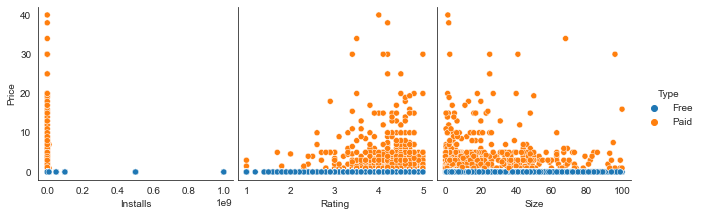

In [101]:
sns.pairplot(data=app_df, hue="Type",y_vars=['Price'], x_vars=['Installs','Rating','Size'],height=3)

##### Rating distribution - What is the distribution of rating?

mean Rating is:  4.17


<Figure size 3600x4680 with 0 Axes>

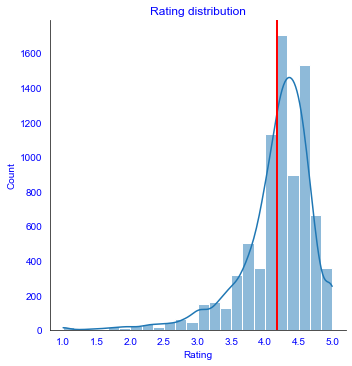

In [102]:
fig = plt.figure(figsize=(50,65))
ax = sns.displot(data=app_df,  
                  bins=24,
                  x="Rating",
                  kde=True
                  )
plt.title("Rating distribution",color="blue")
plt.xlabel("Rating",color="blue")
plt.ylabel("Count",color="blue")
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.axvline(x=app_df.Rating.mean(),
            color='red',
            lw=2)


print("mean Rating is: ", round(app_df.Rating.mean(),2))

In [103]:
stars = []
fraction = []
step =0.5
total_number_of_apps = len(app_df.Rating)
for i in np.arange(0, 5, step):
    number_of_apps = len(app_df.loc[(app_df.Rating>i)&(app_df.Rating<=i+step)])
    fraction.append(str(round(number_of_apps*100/total_number_of_apps,1))+"%")
    stars.append(str(i)+"-"+str(i+step))
ara =zip(stars,fraction)    
print(tabulate(ara, headers=["stars", "fraction"]))

stars    fraction
-------  ----------
0.0-0.5  0.0%
0.5-1.0  0.2%
1.0-1.5  0.1%
1.5-2.0  0.5%
2.0-2.5  1.0%
2.5-3.0  2.6%
3.0-3.5  6.2%
3.5-4.0  18.8%
4.0-4.5  49.7%
4.5-5.0  20.8%


**<font color='tomato'> Conclusion from Rating distribution:</font>**

   ```half of the apps get between 4 to 4.5 stars ```

#### Which category has the highest share? 

In [104]:
categories = app_df.Category.value_counts().sort_values(ascending=False).head(7)
categories

family             1601
game                910
tools               715
productivity        301
personalization     298
lifestyle           296
finance             295
Name: Category, dtype: int64

In [105]:
top_apps_df = app_df.loc[app_df["Rating"]>=4.0]
top_categories = top_apps_df.Category.value_counts().sort_values(ascending=False).head(7)
top_categories

family             1205
game                762
tools               488
personalization     267
productivity        243
finance             222
medical             215
Name: Category, dtype: int64

In [106]:
bottom_apps_df = app_df.loc[app_df["Rating"]<4.0]
bottom_categories = bottom_apps_df.Category.value_counts().sort_values(ascending=False).head(7)
bottom_categories

family       396
tools        227
game         148
lifestyle     91
business      76
medical       74
finance       73
Name: Category, dtype: int64

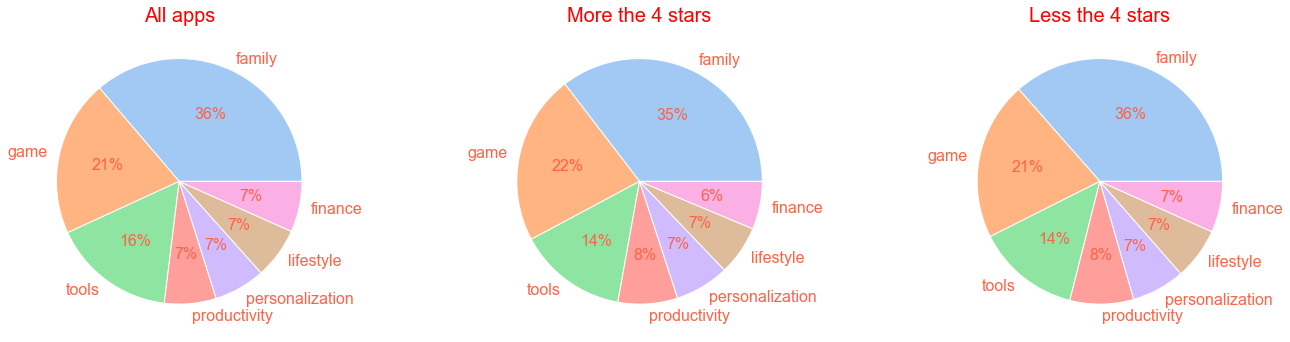

In [107]:
plt.figure(figsize=(22,12))
colors = sns.color_palette('pastel')[0:7]

plt.subplot(1,3,1)
plt.pie(categories,
        labels=categories.index,
        textprops={'fontsize': 16,'color':"tomato"},
        autopct='%.0f%%',colors = colors)
plt.title("All apps",size=20,color="red")

plt.subplot(1,3,2)
plt.pie(top_categories,
        labels=categories.index,
        textprops={'fontsize': 16,'color':"tomato"},
        autopct='%.0f%%',colors = colors)
plt.title("More the 4 stars",size=20,color="red")

plt.subplot(1,3,3)
plt.pie(bottom_categories,
        labels=categories.index,
        textprops={'fontsize': 16,'color':"tomato"},
        autopct='%.0f%%',colors = colors)
plt.title("Less the 4 stars",size=20,color="red")

plt.subplots_adjust(wspace=0.5)
plt.show()

**<font color='tomato'> Conclusion from Rating distribution</font>**

   ```High ranked apps and low ranking apps has the same apps categories Distribution   ```

### <span style="color:red">correlations</span>

In [108]:
print("there are "+str(len(app_df.Category.unique()))+" diffrent apps categories")

there are 33 diffrent apps categories


In [109]:
Category_rate = app_df.groupby("Category").Rating.mean().round(2)
print(Category_rate.sort_values(ascending=False).head())
print(Category_rate.sort_values(ascending=False).tail())

Category
events                 4.44
art_and_design         4.36
education              4.36
books_and_reference    4.34
personalization        4.33
Name: Rating, dtype: float64
Category
travel_and_local       4.07
maps_and_navigation    4.04
tools                  4.04
video_players          4.04
dating                 3.97
Name: Rating, dtype: float64


dating apps getting the lowest ranking, event apps get the lead.

In [110]:
agg = app_df.groupby("Category")[["Price","Rating","Installs","Reviews"]].mean().round(2)
agg.head()

,Price,Rating,Installs,Reviews
Category,,,,
art_and_design,0.10,4.36,1872673.77,23264.51
auto_and_vehicles,0.03,4.19,727805.48,15940.14
beauty,0.00,4.28,640861.90,9407.93
books_and_reference,0.14,4.34,9856755.36,98940.27
business,0.25,4.10,2660370.69,37746.44


In [111]:
agg.corr()

,Price,Rating,Installs,Reviews
Price,1.000000,-0.063220,-0.111329,-0.081830
Rating,-0.063220,1.000000,-0.228818,-0.091765
Installs,-0.111329,-0.228818,1.000000,0.878232
Reviews,-0.081830,-0.091765,0.878232,1.000000


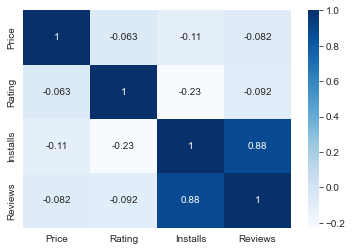

In [112]:
sns.heatmap(agg.corr(),cmap="Blues", annot=True);

**<font color='tomato'> Conclusion from correlations</font>**

1. Rating isn't in correlation with the other numeric columns
1. Apps with a big number of installs have a big number of reviews, but it ain't mean that they are good reviews
1. The relation between Installs and Reviews is significant but not interesting

In [113]:
def arra (category):
    plt.figure(figsize=(28,18))
    araa = app_df.groupby("Rating").mean() 
    fig, ax = plt.subplots(1, 1)
    plt.plot(araa.index,araa[category])
    ax.set_title(category+" VS Rating")
    ax.set_xlabel("Rating")
    ax.set_ylabel(category)

widgets.interact(arra, category=["Installs","Size","Price","Reviews"]) 


interactive(children=(Dropdown(description='category', options=('Installs', 'Size', 'Price', 'Reviews'), value…

<function __main__.arra(category)>

### Reviews

In [114]:
reviews = reviews_df.groupby(["App","Sentiment"]).Translated_Review.count()
reviews= reviews.unstack()
reviews= reviews.reset_index()
reviews.head()

Sentiment,App,Negative,Neutral,Positive
0,10 best foods for you,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,9.0,23.0
3,1800 contacts - lens store,6.0,10.0,64.0
4,1line – one line with one touch,8.0,3.0,27.0


In [115]:
app_reviews_df = pd.merge(app_df,reviews,how="inner")
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,art & design
1,coloring book moana,art_and_design,3.9,967,14.0,500000,Free,0.0,Everyone,art & design;pretend play
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.7,5000000,Free,0.0,Everyone,art & design
3,sketch - draw & paint,art_and_design,4.5,215644,25.0,50000000,Free,0.0,Teen,art & design
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8,100000,Free,0.0,Everyone,art & design;creativity


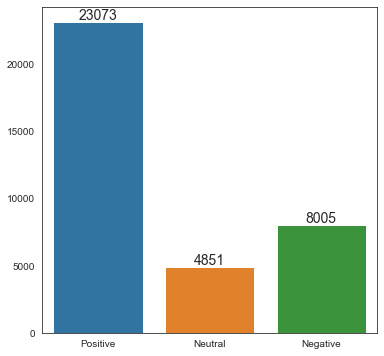

In [116]:
plt.figure(figsize=(6,6))
Positive = app_reviews_df.Positive.sum()
Neutral= app_reviews_df.Neutral.sum()
Negative = app_reviews_df.Negative.sum()
ax = sns.barplot(x=["Positive","Neutral","Negative"], y=[Positive,Neutral,Negative])
for container in ax.containers:
    ax.bar_label(container,size=14)

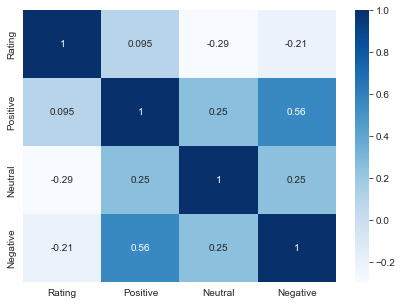

In [117]:
plt.figure(figsize=(7,5))
agg = app_reviews_df.groupby("Category")[["Rating","Positive","Neutral","Negative"]].mean().round(2).reset_index()
sns.heatmap(agg.corr(),cmap="Blues", annot=True);

There is no correlation between the mean number of reviews to the rating. 

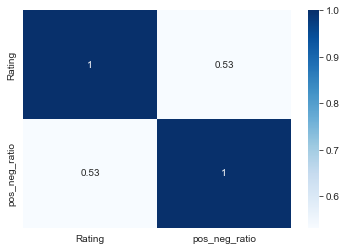

In [118]:
agg["pos_neg_ratio"] =  agg["Positive"]/agg["Negative"]
sns.heatmap(agg.loc[:,["Category","Rating","pos_neg_ratio"]].corr(),cmap="Blues", annot=True);

There is a correlation between the positive-negative ratio to the rating.

<AxesSubplot:xlabel='pos_neg_ratio', ylabel='Rating'>

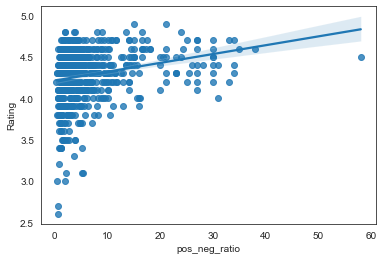

In [119]:
app_reviews_df["pos_neg_ratio"] =  round(app_reviews_df["Positive"]/app_reviews_df["Negative"],2)
null_rows = app_reviews_df[app_reviews_df["pos_neg_ratio"].isna()]
app_reviews_df.drop(index=null_rows.index, inplace=True)
sns.regplot(data=app_reviews_df,y="Rating",x="pos_neg_ratio")

### <span style="color:red">conclusion</span>

* Events apps have the highest rating while dating gets the lowest rating.
* The relation between reviews and rating is week.
* Average rating of apps is 4.17.
* Popular apps with a high number of installs get a rating above the average rating.
* the biggest major of the reviews is positive.

### <span style="color:red">Bonus: Python vs SQL</span>

SQLite is a self-contained, file-based SQL database. 

SQLite comes bundled with Python and can be used in any of your Python applications without having to install any additional software.

To import SQLite you need to run "**import sqlite3**"

In [120]:
from pandasql import sqldf
import sqlite3
import time

* create database in memory
* create cursor object to the new database
* convert the above-mentioned data frame to db files in memory

In [121]:
db = sqlite3.connect(':memory:')
cursor = db.cursor()
app_db = app_df.to_sql("app", db, if_exists='replace')
reviews_db = reviews_df.to_sql("reviews", db, if_exists='replace')

C:\Users\PC\anaconda3\envs\visualization-env\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


sql query to list

In [122]:
app_sql_list = cursor.execute('''SELECT * FROM app limit 5 ''').fetchall()
db.commit()
print("returned type: ", type(app_sql_list))
print(app_sql_list)

returned type:  <class 'list'>
[(0, 'photo editor & candy camera & grid & scrapbook', 'art_and_design', 4.1, 159, 19.0, 10000, 'Free', 0.0, 'Everyone', 'art & design'), (1, 'coloring book moana', 'art_and_design', 3.9, 967, 14.0, 500000, 'Free', 0.0, 'Everyone', 'art & design;pretend play'), (2, 'u launcher lite – free live cool themes, hide apps', 'art_and_design', 4.7, 87510, 8.7, 5000000, 'Free', 0.0, 'Everyone', 'art & design'), (3, 'sketch - draw & paint', 'art_and_design', 4.5, 215644, 25.0, 50000000, 'Free', 0.0, 'Teen', 'art & design'), (4, 'pixel draw - number art coloring book', 'art_and_design', 4.3, 967, 2.8, 100000, 'Free', 0.0, 'Everyone', 'art & design;creativity')]


sql query do pandas dataframe

In [123]:
app_sql_df= pd.read_sql_query('''SELECT * FROM app limit 5 ''',db)
print("returned type: ", type(app_sql_df))
app_sql_df.head()

returned type:  <class 'pandas.core.frame.DataFrame'>


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,art & design
1,1,coloring book moana,art_and_design,3.9,967,14.0,500000,Free,0.0,Everyone,art & design;pretend play
2,2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.7,5000000,Free,0.0,Everyone,art & design
3,3,sketch - draw & paint,art_and_design,4.5,215644,25.0,50000000,Free,0.0,Teen,art & design
4,4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8,100000,Free,0.0,Everyone,art & design;creativity


### pandas VS SQLite speed competition

I am using decorator warper to get the runtime

In [124]:
def decoratortimer(decimal):
    def decoratorfunction(f):
        def wrap(*args, **kwargs):
            time1 = time.monotonic()
            result = f(*args, **kwargs)
            time2 = time.monotonic()
            print('{:s} function took {:.{}f} ms'.format(f.__name__, ((time2-time1)*1000.0), decimal ))
            return result
        return wrap
    return decoratorfunction

##### Sort

In [125]:
@decoratortimer(2)
def sort_lite3():
  cursor.execute('''SELECT * FROM app ORDER BY App ASC''')
  db.commit()

@decoratortimer(2)
def sort_pandas():
  app_df.sort_values(by='App')

sort_lite3()
sort_pandas()

sort_lite3 function took 16.00 ms
sort_pandas function took 16.00 ms


##### Join

In [126]:
@decoratortimer(2)
def join_lite3():
  sorted_list = cursor.execute('''SELECT * FROM app
                                  INNER JOIN reviews 
                                  ON app.App = reviews.App''')
  db.commit()

@decoratortimer(2)
def join_pandas():
  app_reviews = pd.merge(app_df,reviews,how="inner", on='App')

join_lite3()
join_pandas()

join_lite3 function took 141.00 ms
join_pandas function took 0.00 ms


##### Group by

In [127]:
@decoratortimer(2)
def groupby_lite3():
  cursor.execute('SELECT avg(Rating), sum(Reviews) FROM app GROUP BY Category')
  db.commit()

@decoratortimer(2)
def groupby_pandas():
  app_df.groupby("Category").agg({'Rating': np.mean, 'Reviews': np.sum})
  
groupby_lite3()
groupby_pandas()

groupby_lite3 function took 0.00 ms
groupby_pandas function took 0.00 ms


In [128]:
db.close()